<a href="https://colab.research.google.com/github/DevanWestley/SleepDisorderAnalysis/blob/main/Sleep_Disorder_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Made By: Devan Westley - Teknologi Informasi 23**

# **GenderDataset Columns:**


Gender: The gender of the person (Male/Female).

Age: The age of the person in years.

Sleep Duration (hours): The number of hours the person sleeps per day.

Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.

Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).

Heart Rate (bpm): The resting heart rate of the person in beats per minute.

Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).


# **Details about Sleep Disorder Column:**

None: The individual does not exhibit any specific sleep disorder.

Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

# **Questions :**

1.   Berapa persentase orang yang menderita *sleep disorder*?
2.   Umur berapa yang paling rawan menderita *sleep disorder*?
3.   Apakah jenis kelamin berpengaruh pada peluang menderita *sleep disorder*?
4.   Berapa batas maximum heart rate yang rawan *sleep disorder*?
5.   Berapa lama durasi tidur per hari yang rawan terkena *sleep disorder*?
6.   Apakah kategori BMI memengaruhi kecenderungan seseorang terkena *sleep disorder*?
7.   Bagaimana pengaruh kualitas tidur dan level stress terhadap kecenderungan seseorang terkena *sleep disorder*?
8.   Apakah umur berpengaruh terhadap *sleep disorder*?
9.   Berapa perkiraan kasar waktu untuk melakukan aktivitas fisik agar terhindar dari *sleep disorder*?
10. Bagaimana ciri-ciri orang yang menderita *sleep disorder*?


## **Import Package yang Dibutuhkan**

In [ ]:
# Import Package yang dibutuhkan
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## **Menampilkan Informasi Data**

In [ ]:
df = pd.read_csv('SleepDisorder.csv')
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Sleep Disorder
0,Male,27,6.1,6,42,6,Overweight,77,None
1,Male,28,6.2,6,60,8,Normal,75,None
2,Male,28,6.2,6,60,8,Normal,75,None
3,Male,28,5.9,4,30,8,Obese,85,Sleep Apnea
4,Male,28,5.9,4,30,8,Obese,85,Sleep Apnea


In [ ]:
# Ukuran dataset
df.shape

(374, 9)

In [ ]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Gender                      object
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Sleep Disorder              object
dtype: object

## **Simple Feature Engineering**

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].replace({0:'Yes', 1:'No', 2:'Yes'})

## **1. Berapa persentase orang yang menderita *sleep disorder*?**

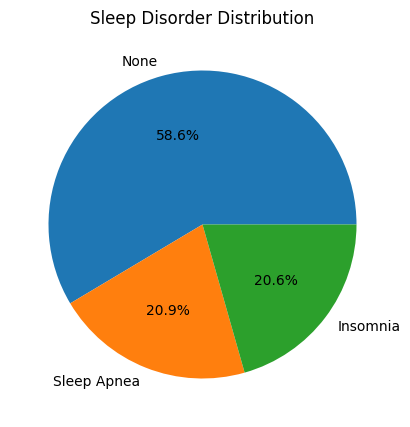

In [ ]:
sleep_disorder_counts = df['Sleep Disorder'].value_counts()

plt.figure(figsize = (5,5))

plt.pie(sleep_disorder_counts, labels=sleep_disorder_counts.index, autopct='%1.1f%%')

plt.title('Sleep Disorder Distribution')

plt.show()

Berdasarkan data terdapat 41,5% orang mengalami *sleep disorder* di antaranya 20,9% mengalami *Sleep Apnea* dan 20,6% mengalami *Insomnia*, sedangkan sisanya tidak mengalami *sleep disorder*

## **2. Umur berapa yang paling rawan menderita sleep disorder?**

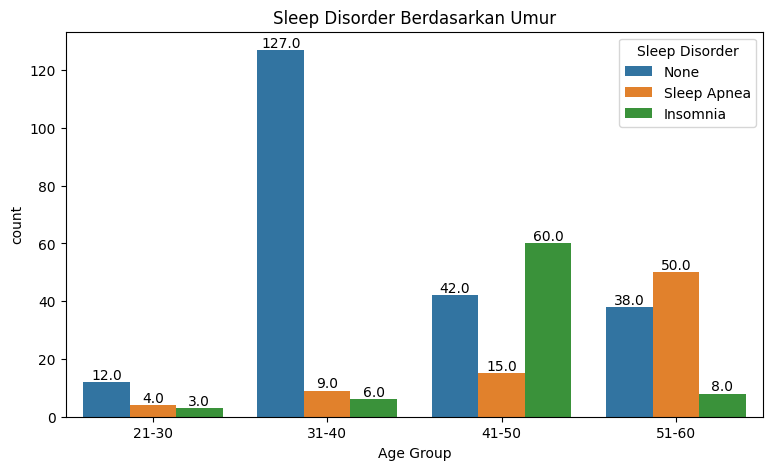

In [ ]:
# Lakukan binning untuk age
bins = [20, 30, 40, 50, 60]
labels = ['21-30', '31-40', '41-50', '51-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='Age Group', hue='Sleep Disorder')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Sleep Disorder Berdasarkan Umur')
plt.show()

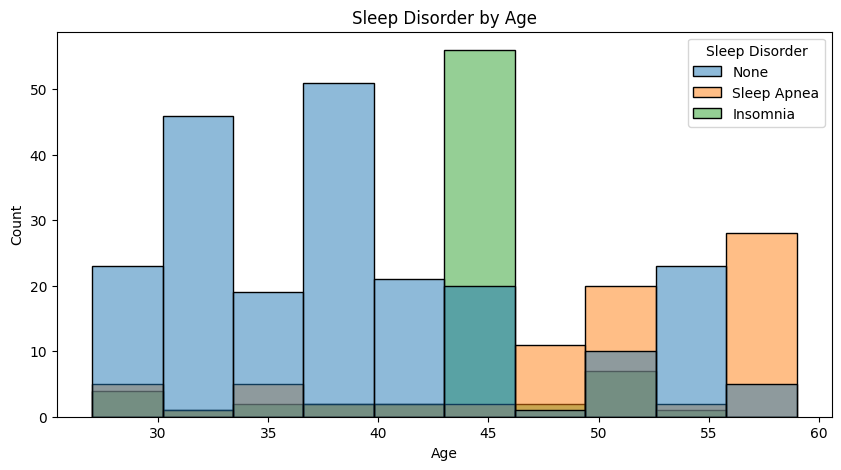

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Age', hue='Sleep Disorder')

plt.title('Sleep Disorder by Age')
plt.show()

Tampak bahwa rentang umur 41 tahun ke atas cukup rawan terkena *sleep disorder*. Semakin bertambahnya umur, maka peluang terkena *sleep disorder* cenderung semakin besar. Insomnia rawan terjadi di rentang 41 - 50 tahun dan Sleep Apnea rawan terjadi di rentang 51 tahun ke atas.

## **3. Apakah jenis kelamin berpengaruh pada peluang menderita sleep disorder?**

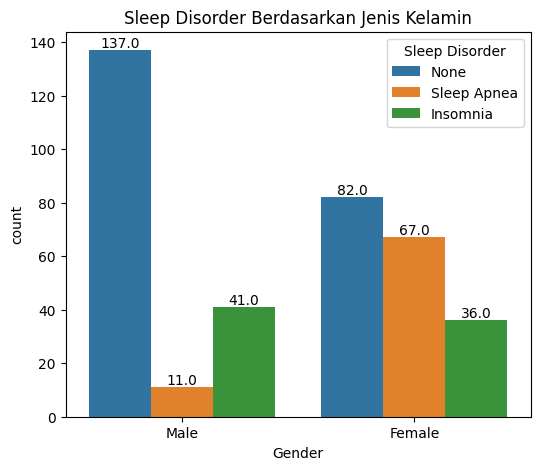

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Gender', hue='Sleep Disorder')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Sleep Disorder Berdasarkan Jenis Kelamin')
plt.show()

Ya, tampak ada perbedaan yang sangat signifikan mengenai penderita sleep disorder berdasarkan jenis kelamin.
Perempuan lebih rawan menderita penyakit jantung dibandingkan laki-laki.

## **4. Berapa batas maximum heart rate yang rawan sleep disorder?**

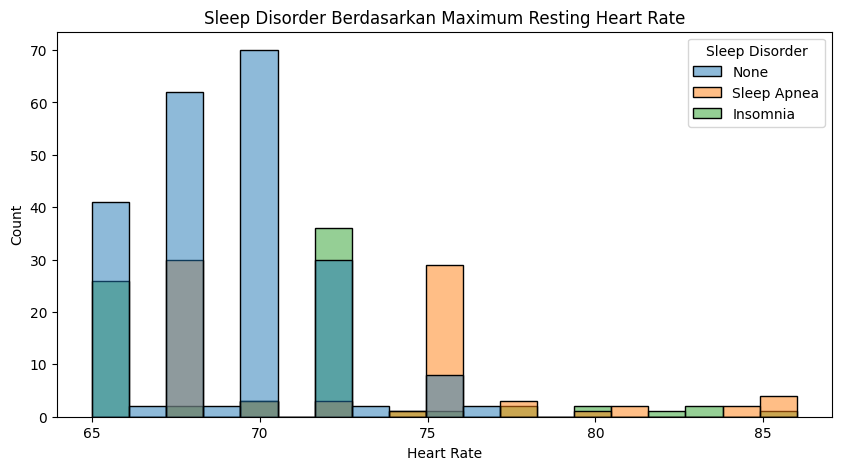

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Heart Rate', hue='Sleep Disorder')

plt.title('Sleep Disorder Berdasarkan Maximum Resting Heart Rate')
plt.show()

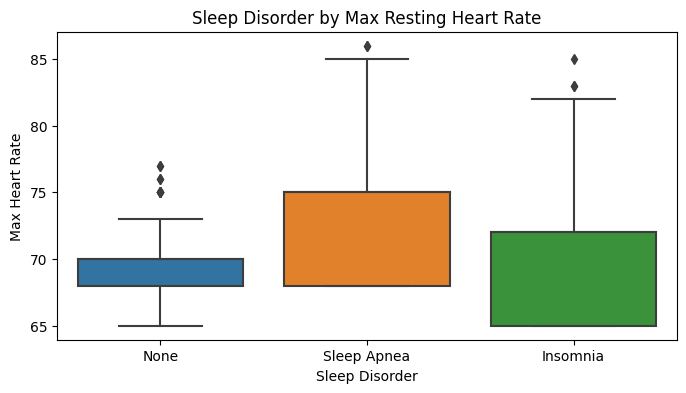

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=df)
plt.title('Sleep Disorder by Max Resting Heart Rate')
plt.xlabel('Sleep Disorder')
plt.ylabel('Max Heart Rate')
plt.show()

Terlihat sangat jelas bahwa sebagian besar orang yang menderita sleep disorder memiliki maximum resting heart rate di atas 70. Dari grafik tersebut tampak bahwa peluang menderita penyakit jantung semakin besar jika maximum resting heart ratenya semakin tinggi.

## **5. Berapa lama durasi tidur per hari yang rawan terkena** *sleep disorder?*

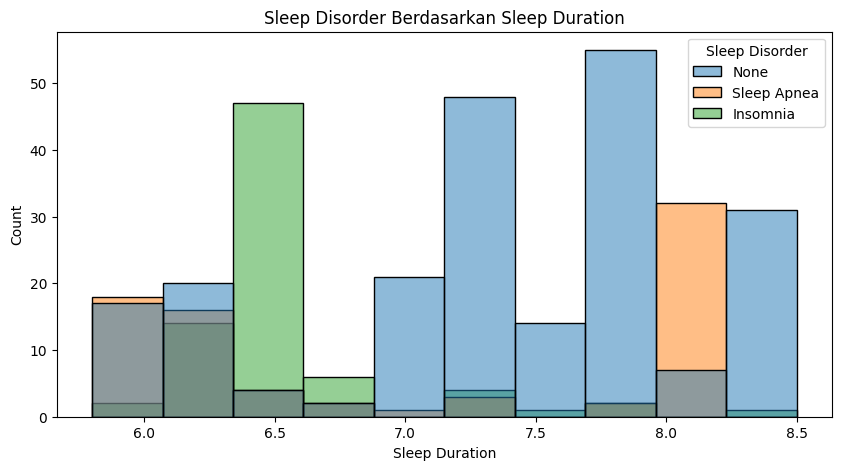

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Sleep Duration', hue='Sleep Disorder')

plt.title('Sleep Disorder Berdasarkan Sleep Duration')
plt.show()

Orang dengan waktu tidur kurang dari 7 jam per hari cenderung lebih rentan mengalami *sleep disorder*, sedangkan sebaliknya orang yang tidur secara optimal yaitu sekitar 7 sampai 8 jam per hari lebih terhindar terkena *sleep disorder*.

## **6. Apakah kategori BMI memengaruhi kecenderungan seseorang terkena sleep disorder?**

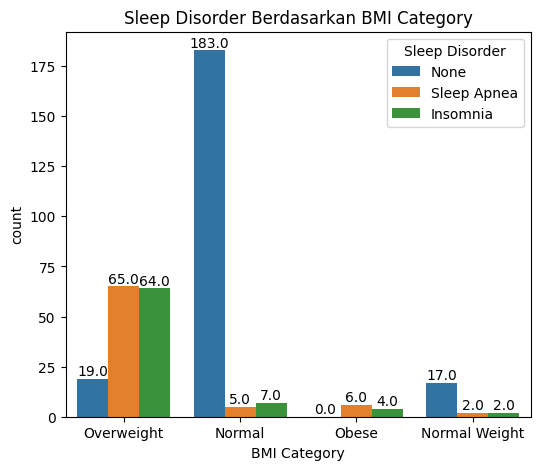

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Sleep Disorder Berdasarkan BMI Category')
plt.show()

Tampak bahwa orang dengan kategori BMI normal pada umumnya tidak mengalami *sleep disorder*, sedangkan orang dengan kategori BMI *overweight/obese* cenderung mengalami *sleep disorder*. Jadi, dapat ditarik kesimpulan bahwa kategori BMI memengaruhi kecenderungan seseorang terkena sleep disorder.

## **7. Bagaimana pengaruh kualitas tidur dan level stress terhadap kecenderungan seseorang terkena sleep disorder?**

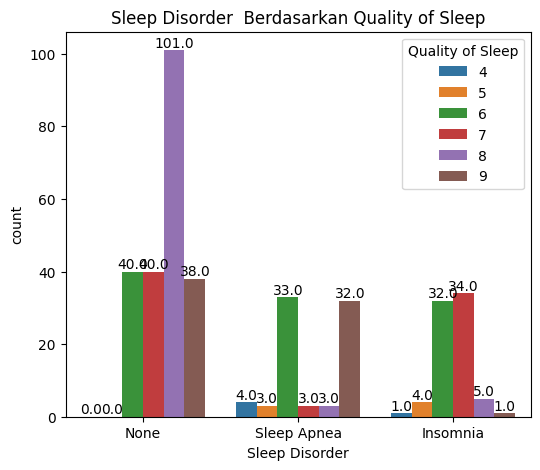

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Sleep Disorder', hue='Quality of Sleep')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Sleep Disorder  Berdasarkan Quality of Sleep')
plt.show()

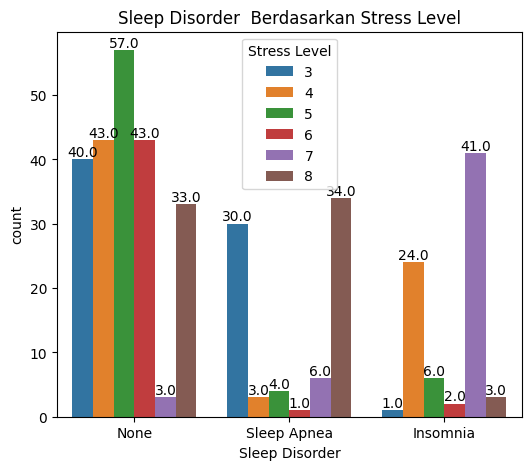

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Sleep Disorder', hue='Stress Level')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Sleep Disorder  Berdasarkan Stress Level')
plt.show()

Tidak dapat ditarik kesimpulan secara langsung dari grafik tersebut karena data terlalu objektif. Namum dapat ditarik kesimpulan sementara bahwa jika ratingan secara subjektifnya objektif maka orang cenderung mengalami *sleep disorder* saat QoSnya kurang dari 7 atau SLnya di atas 6.

# **8. Apakah umur berpengaruh terhadap sleep disorder?**

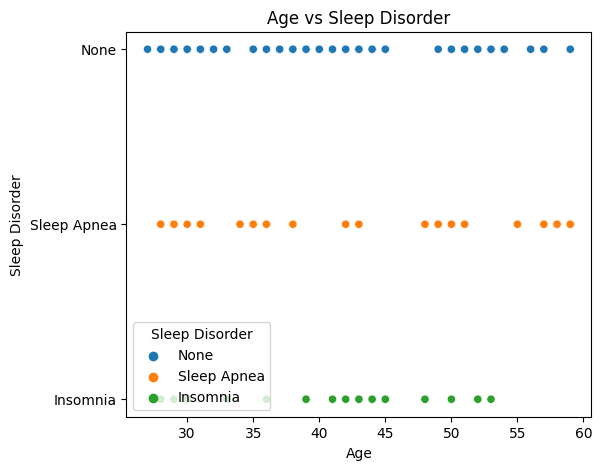

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.scatterplot(data=df, x='Age', y='Sleep Disorder', hue='Sleep Disorder')


plt.title('Age vs Sleep Disorder')
plt.show()

Umur tidak terlalu berpengaruh secara langsung terhadap Sleep Disorder yang dialami seseorang, karena di grafik data divergen.

## **9. Berapa perkiraan kasar waktu untuk melakukan aktivitas fisik agar terhindar dari *sleep disorder*?**

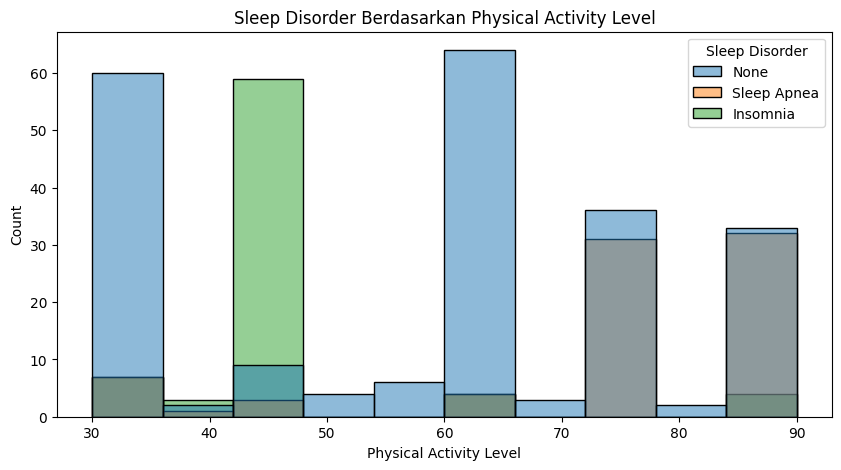

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Physical Activity Level', hue='Sleep Disorder')

plt.title('Sleep Disorder Berdasarkan Physical Activity Level')
plt.show()

Diperkirakan bahwa agar terhindar dari *sleep disorder* setidaknya kita harus melakukan aktivitas fisik sekitar 60 menit atau 1 jam setiap harinya.

## **10. Bagaimana ciri-ciri orang yang menderita sleep disorder?**

# **Kesimpulan :**

1. Perempuan dan orang yang berusia lebih dari 41 tahun memiliki kemungkinan lebih besar menderita *sleep disorder*.
2. Detak jantung saat relaksasi maksimal di atas 70 bpm.
3. Memiliki waktu tidur harian kurang dari 7 jam.
4. Orang dengan kategori BMI *overwweight/obese* memiliki kemungkinan lebih besar menderita *sleep disorder*.
5. Melakukan aktivitas harian secara berlebihan atau tak sama sekali.
6. Kualitas tidur yang buruk.
7. Memiliki level stress di atas rata-rata orang pada umumnya.